# data loading

In [1]:
#data collected from Road traffic statistics: https://roadtraffic.dft.gov.uk/downloads
#file contains data for number of vehicles that travel past the count point (in both directions) on an average day of the year.
import pandas as pd

df = pd.read_csv('dft_traffic_counts_aadf.csv')
df.head()





Count_point_id  Year  Region_id Region_name Region_ons_code  \
0            6750  2014          6      London       E12000007   
1            8352  2014          6      London       E12000007   
2            6807  2014          6      London       E12000007   
3           16544  2014          5  North West       E12000002   
4           27765  2014          6      London       E12000007   

   Local_authority_id  Local_authority_name Local_authority_code Road_name  \
0                  96             Islington            E09000019      A201   
1                 104              Lewisham            E09000023        A2   
2                 178  Kingston upon Thames            E09000021      A240   
3                  85            Manchester            E08000003       A57   
4                  57                Barnet            E09000003     A5109   

  Road_category  ... Buses_and_coaches  LGVs HGVs_2_rigid_axle  \
0            PA  ...               787  1728               204   
1            PA  ...               430  1415               258   
2            PA  ...               175  1589               251   
3            PA  ...               911  1931               239   
4            PA  ...               302  1651               246   

   HGVs_3_rigid_axle  HGVs_4_or_more_rigid_axle  HGVs_3_or_4_articulated_axle  \
0                 74                        132                            15   
1                 36                         58                             6   
2                 35                         13                             2   
3                 53                        105                            25   
4                 12                         12                             0   

   HGVs_5_articulated_axle  HGVs_6_articulated_axle  All_HGVs  \
0                        6                       18       449   
1                       11                       22       390   
2                        4                       19       325   
3                      107                       47       576   
4                        1                        1       273   

  All_motor_vehicles  
0              11916  
1               9426  
2              12951  
3              16107  
4              19276  

[5 rows x 34 columns]

# EDA-analysis

In [2]:
# looking at the columns we will work with
df.columns

Index(['Count_point_id', 'Year', 'Region_id', 'Region_name', 'Region_ons_code',
       'Local_authority_id', 'Local_authority_name', 'Local_authority_code',
       'Road_name', 'Road_category', 'Road_type', 'Start_junction_road_name',
       'End_junction_road_name', 'Easting', 'Northing', 'Latitude',
       'Longitude', 'Link_length_km', 'Link_length_miles', 'Estimation_method',
       'Estimation_method_detailed', 'Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
       'All_motor_vehicles'],
      dtype='object')

In [3]:
#checking data quality in regards to null values
df.isnull().sum()

Count_point_id                       0
Year                                 0
Region_id                            0
Region_name                          0
Region_ons_code                      0
Local_authority_id                   0
Local_authority_name                 0
Local_authority_code                 0
Road_name                            0
Road_category                        0
Road_type                            0
Start_junction_road_name        121975
End_junction_road_name          121964
Easting                              0
Northing                             0
Latitude                             0
Longitude                            0
Link_length_km                  121499
Link_length_miles               121499
Estimation_method                    0
Estimation_method_detailed           0
Pedal_cycles                         0
Two_wheeled_motor_vehicles           0
Cars_and_taxis                       0
Buses_and_coaches                    0
LGVs                     

Text(0.5, 1.0, 'UK daily traffic average (mileage)')

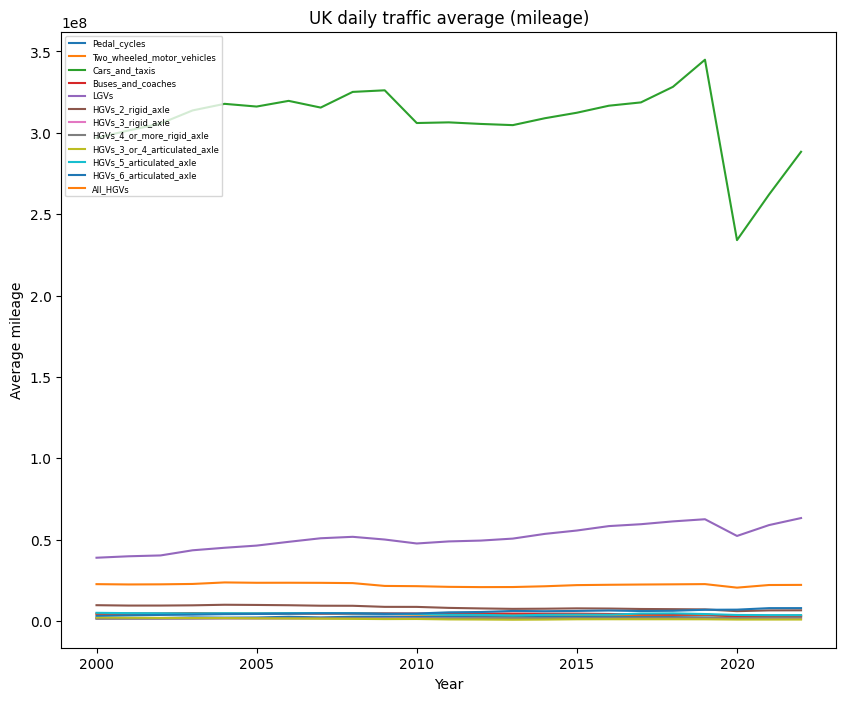

In [4]:
#list of vehicle types in the data

veh_lst = ['Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs']
#look at the average mileage of a road junction in the view of different type of vehicles
import matplotlib.pyplot as plt
veh_df = df.groupby('Year')[veh_lst].sum()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(veh_df, label = veh_lst)
ax.legend(loc = 'upper left', prop={'size': 6})
plt.xlabel('Year')
plt.ylabel('Average mileage')
plt.title('UK daily traffic average (mileage)')



<Axes: title={'center': 'All motor vehicles average daily traffic (mileage)'}, xlabel='Year'>

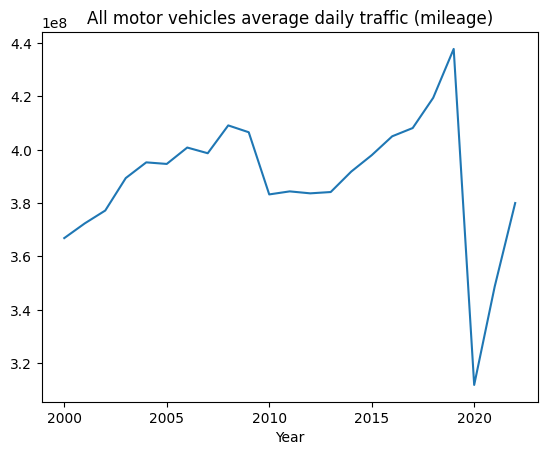

In [5]:
# a view of all motor vehicle average mileage in the past years
df_all = df.groupby('Year')['All_motor_vehicles'].sum()
df_all.plot(title='All motor vehicles average daily traffic (mileage)')

In [6]:
# Now we want to look at spacial distribution by local authority code of the UK traffic in the past year
count = df.groupby(['Year', 'Local_authority_code'])['All_motor_vehicles'].sum().reset_index()
count_2022 = count[count['Year'] == 2022]
count_2022.sort_values(by='All_motor_vehicles', ascending=False)

Year Local_authority_code  All_motor_vehicles
4654  2022            E10000016            11013152
4652  2022            E10000014             9520552
4665  2022            E10000030             9083107
4653  2022            E10000015             8950306
4650  2022            E10000012             7956841
...    ...                  ...                 ...
4669  2022            S12000005              162143
4683  2022            S12000027              112349
4681  2022            S12000023               74064
4674  2022            S12000013               54441
4566  2022            E06000053                3736

[206 rows x 3 columns]

In [7]:
#importing wards data to geopandas for plotting
#importing postcode data to map wards to postcodes
#& (map['LONG'] > -3.4) & (map['LONG'] < 1.7)
import geopandas as gpd
map = gpd.read_file('Wards_December_2023_Boundaries_UK_BFC_9190024445622031540/WD_DEC_2023_UK_BFC.shp')
map = map[(map['LAT'] < 55.8)]
LAD = pd.read_csv("Middle_Layer_Super_Output_Area_(2021)_to_Ward_to_LAD_(May_2023)_Lookup_in_England_and_Wales.csv")

# Map the wards with the local authority code
merge = pd.merge(map, LAD[['WD23CD', 'LAD23CD']], how='left', on='WD23CD')
merge.drop_duplicates(subset='WD23CD', keep='first', inplace=True)

# now we can merge the traffic count to the wards on the lac
merge_2 = pd.merge(merge, count_2022[['Local_authority_code', 'All_motor_vehicles']], how='left', left_on='LAD23CD',right_on='Local_authority_code')
merge_2.drop_duplicates(subset='WD23CD', keep='first', inplace=True)
merge_2['All_motor_vehicles'] = merge_2['All_motor_vehicles'].fillna(0)

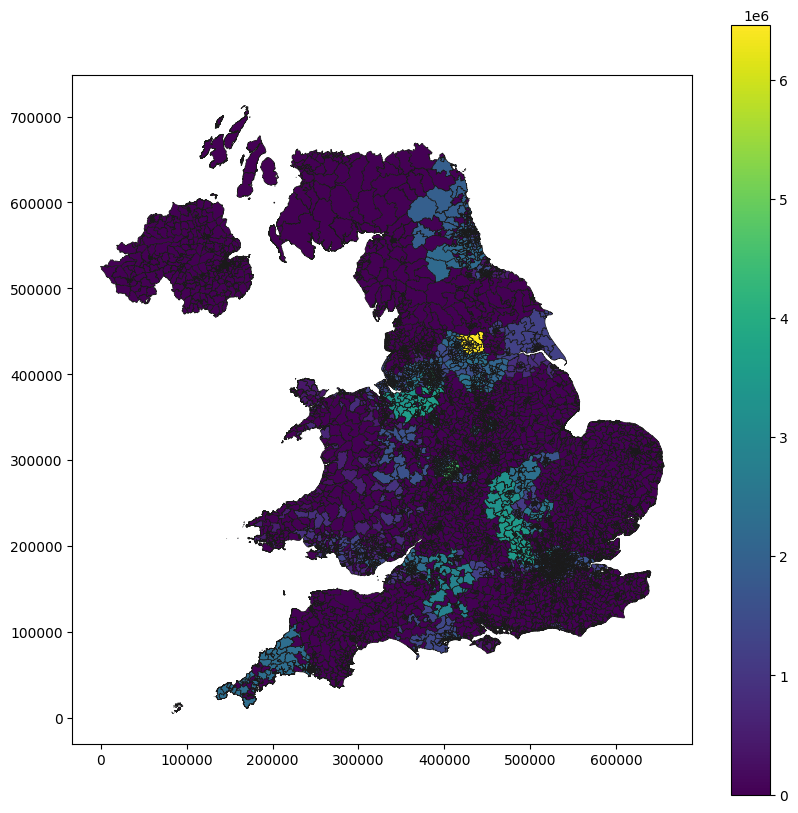

In [8]:
# Create a spacial view
fig, ax = plt.subplots(figsize=(10, 10))
merge_2.plot(ax=ax, column='All_motor_vehicles', cmap='viridis', linewidth=0.5, edgecolor='0.1', legend=True)

# Show the plot

plt.show()

# Prophet forecasting

In [9]:
# Suppose we would like to predict the future traffic for each region in the next 10 years.
# In here we will use the facebook prophet model as the modelling approach, as in the above eda process we can see the impact of covid-19 has caused a unpresendented impact to the trend.
# On this note, Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects, which make it a good candidate to deal with seasonal data
# and also its ability to handles outliers well.

In [10]:
import pandas as pd
def data_read(path: str) -> pd.DataFrame:

    df = pd.read_csv(path)

    return df


def add_future_frame(model, period: int) -> pd.DataFrame:

    df = model.make_future_dataframe(periods=period)

    return df

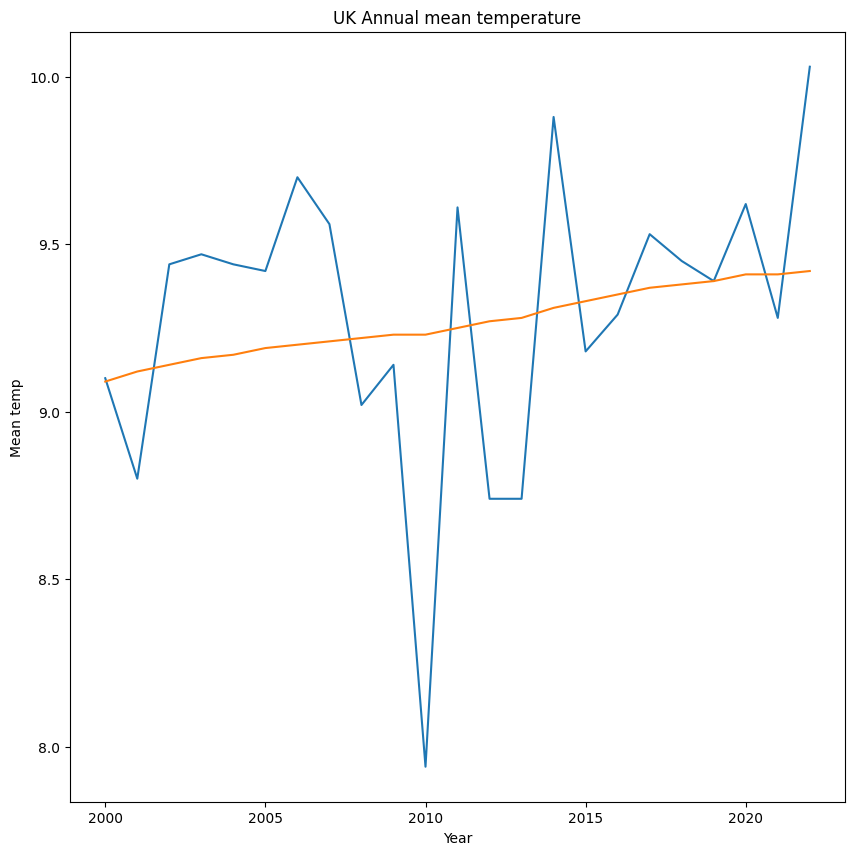

In [12]:
import matplotlib.pyplot as plt
# importing historic data and weather data
df_traffic = data_read('dft_traffic_counts_aadf.csv')
# we can add regressor to the linear part of the prophet model, which aims to improve the forecasting accuracy.
# to do that we need the weather data of UK since 2000
df_weather = data_read('chart-data.csv')
df_weather.set_index('date', inplace=True)
# lets visualize the mean tempearture change over the years and its trend since 2000
# df_weather.index = pd.to_datetime(df_weather.index, format='%Y%m%d').year
fig, ax = plt.subplots(figsize=(10,10)) 

ax.plot(df_weather[df_weather.index >= 2000]['Annual mean temperature'], label='Annual mean temperature')
ax.plot(df_weather[df_weather.index >= 2000]['Annual mean temperature (trend)'], label='Annual mean temperature (trend)')
plt.ylabel('Mean temp')
plt.xlabel('Year')
plt.title('UK Annual mean temperature')
plt.show()

# Testing

In [10]:
import json

# Convert the GeoDataFrame to JSON
cols = ['geometry', 'LAD23CD', 'All_motor_vehicles']
merge_gdf = merge_2[cols]
gdf = merge_gdf.copy(deep=True)
# geojson = json.loads(gdf.to_json())

In [11]:
import numpy as np
gdf['test'] = np.arange(len(gdf))

In [12]:
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
# Convert GeoDataFrame to GeoJSON
gdf = gdf[0:100]
geojson_data = gdf.to_json()

# Verify that 'LAD23CD' is in the properties of the GeoJSON
geojson_dict = json.loads(geojson_data)
if 'LAD23CD' not in geojson_dict['features'][0]['properties']:
    raise KeyError("'LAD23CD' not found in GeoJSON properties")

# Create the Folium map
m = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=12)

# Add the choropleth layer
choropleth = folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=gdf,
    columns=['test', 'All_motor_vehicles'],  # Replace 'count' with the name of your column that contains the data
    key_on='feature.properties.test',  # This should match the property in the GeoJSON
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Count'
).add_to(m)

# Add the tooltip functionality
tooltip = GeoJsonTooltip(
    fields=['test', 'All_motor_vehicles'],  # Make sure 'name' is a column in your GeoDataFrame
    aliases=['Name: ', 'Count: '],
    localize=True
)

# Add the GeoJson to the map on top of the choropleth
geojson = folium.GeoJson(
    geojson_data,
    tooltip=tooltip
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Save and display the map
# m.save('map_with_labels.html')
m

In [129]:
LAD_df = pd.merge(map, LAD[['WD23CD', 'LAD23CD']], how='left', on='WD23CD')
LAD_df = LAD_df[LAD_df['LAD23CD'].notna()]

In [139]:
merge = pd.merge(df, LAD_df[['LAD23CD', 'geometry']], how='left', left_on='Local_authority_code', right_on='LAD23CD')
merge.drop_duplicates(subset=['Count_point_id', 'Year'], keep='first', inplace=True)
merge = merge.groupby(['Year', 'Local_authority_code'])['All_motor_vehicles'].sum().reset_index()
df_test

Count_point_id  Year  Region_id               Region_name  \
0                 6750  2014          6                    London   
1                 8352  2014          6                    London   
2                 6807  2014          6                    London   
3                16544  2014          5                North West   
4                27765  2014          6                    London   
...                ...   ...        ...                       ...   
533620           89185  2022          8  Yorkshire and the Humber   
533621           73784  2022          5                North West   
533622           91039  2022          3                  Scotland   
533623           48774  2020          7           East of England   
533624           81243  2022          4                     Wales   

       Region_ons_code  Local_authority_id  Local_authority_name  \
0            E12000007                  96             Islington   
1            E12000007                 104              Lewisham   
2            E12000007                 178  Kingston upon Thames   
3            E12000002                  85            Manchester   
4            E12000007                  57                Barnet   
...                ...                 ...                   ...   
533620       E12000003                 100       North Yorkshire   
533621       E12000002                 162                Oldham   
533622       S92000003                  51         Aberdeen City   
533623       E12000006                 128              Thurrock   
533624       W92000004                  22  Rhondda, Cynon, Taff   

       Local_authority_code Road_name Road_category  ... HGVs_2_rigid_axle  \
0                 E09000019      A201            PA  ...               204   
1                 E09000023        A2            PA  ...               258   
2                 E09000021      A240            PA  ...               251   
3                 E08000003       A57            PA  ...               239   
4                 E09000003     A5109            PA  ...               246   
...                     ...       ...           ...  ...               ...   
533620            E10000023       A63            TA  ...               241   
533621            E08000004     A6104            PA  ...               135   
533622            S12000033      A956            TA  ...               278   
533623            E06000034       M25            TM  ...              1563   
533624            W06000016     A4058            PA  ...               267   

       HGVs_3_rigid_axle HGVs_4_or_more_rigid_axle  \
0                     74                       132   
1                     36                        58   
2                     35                        13   
3                     53                       105   
4                     12                        12   
...                  ...                       ...   
533620                63                       234   
533621                27                        29   
533622                56                       102   
533623               420                       311   
533624                54                        37   

        HGVs_3_or_4_articulated_axle  HGVs_5_articulated_axle  \
0                                 15                        6   
1                                  6                       11   
2                                  2                        4   
3                                 25                      107   
4                                  0                        1   
...                              ...                      ...   
533620                            29                      235   
533621                            12                       68   
533622                            14                      110   
533623                           668                     3692   
533624                            19                       32

In [151]:
df_test = merge.groupby(['Year', 'Local_authority_code'])['All_motor_vehicles'].sum().reset_index()
df_test

Year Local_authority_code  All_motor_vehicles
0     2000            E06000001              323189
1     2000            E06000002             1113835
2     2000            E06000003              367009
3     2000            E06000004             1343000
4     2000            E06000005              601288
...    ...                  ...                 ...
4718  2022            W06000020              336531
4719  2022            W06000021              793073
4720  2022            W06000022             1370961
4721  2022            W06000023              537976
4722  2022            W06000024              476541

[4723 rows x 3 columns]

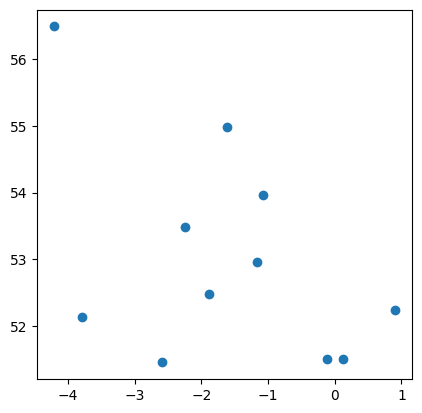

In [45]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Look at the UK daily traffic for this year in a map view
df_region = df[df['Year'] == 2022].groupby('Region_name')['All_motor_vehicles'].sum()



# List of regions in the UK
regions = ['London', 'North West', 'Yorkshire and the Humber', 'Wales',
           'West Midlands', 'Scotland', 'South East', 'East of England',
           'North East', 'South West', 'East Midlands']

# Sample latitude and longitude coordinates (replace with actual coordinates)
latitudes = [51.509865, 53.483959, 53.9590, 52.1307, 52.4862, 56.4907, 51.509865, 52.2405, 54.9784, 51.4545, 52.9548]
longitudes = [-0.118092, -2.244644, -1.0815, -3.7837, -1.8904, -4.2026, 0.118092, 0.9027, -1.6174, -2.5879, -1.1581]

# Create a GeoDataFrame with Point geometries
data = {'Location': regions, 'Latitude': latitudes, 'Longitude': longitudes}
geometry = [Point(lon, lat) for lon, lat in zip(data['Longitude'], data['Latitude'])]

gdf_uk_regions = gpd.GeoDataFrame(data, geometry=geometry, crs=' EPSG:27700')

# Convert Point geometries to Polygons (convex hull)
gdf_uk_regions['geometry'] = gdf_uk_regions.convex_hull

# Plot the GeoDataFrame
gdf_uk_regions.plot()
plt.show()